# Subtyping
## Cards
* $♠ \rightarrow 4$
* $❤ \rightarrow 3$
* $♦ \rightarrow 2$
* $♣ \rightarrow 1$

In [191]:
struct Card
    suit :: Int64
    rank :: Int64
    
    function Card(suit::Int64, rank::Int64)
        @assert(1 <= suit <= 4, "suit is not between 1 and 4")
        @assert(1 <= rank <= 14, "rank is not between 1 and 14")
        new(suit, rank)
    end
end

In [192]:
queen_of_diamonds = Card(2,12)

Q♦

## Global Variables
* `const`: the variable can only be assigned once

In [193]:
const suit_names = ["♣","♦","❤","♠"];
const rank_names = ["A","2","3","4","5","6","7","8","9","10","J","Q","K","A"];

function Base.show(io::IO, card::Card)
    print(io, rank_names[card.rank], suit_names[card.suit])
end

In [194]:
import Base.isless

function isless(c1::Card,c2::Card)
    (c1.suit, c1.rank) < (c2.suit, c2.rank)
end

isless (generic function with 54 methods)

In [195]:
import Base.>


In [196]:
c1 = Card(3,12);
c2 = Card(4,12);

In [197]:
c1 < c2

true

#### Ex18-1

In [198]:
struct MyTime
    hour :: Int64
    minute :: Int64
    second :: Int64
    function MyTime(hour::Int64=0, minute::Int64=0, second::Int64=0)
        @assert(0 <= minute < 60, "Minute is not between 0 and 60")
        @assert(0 <= second < 60, "Second is not between 0 and 60")
        new(hour,minute,second)
    end
end

In [199]:
import Base.isless
function isless(t1::MyTime,t2::MyTime)
    (t1.hour,t1.minute,t1.second) < (t2.hour,t2.minute,t2.second)
end

isless (generic function with 54 methods)

In [200]:
t1 = MyTime(12,32,20);
t2 = MyTime(13,3,2);

In [201]:
t1 < t2

true

## Using Testing
* `@test`

In [202]:
using Test
@test c1 < c2

Test Passed

In [203]:
@test c1 > c2

Test Failed at In[203]:1
  Expression: c1 > c2
   Evaluated: Q❤ > Q♠


LoadError: [91mThere was an error during testing[39m

## Decks
* `Type[]` ==> create an array which limit elements' type

In [204]:
struct Deck
    cards :: Array{Card,1}
end

function Deck()
    deck = Deck(Card[])
    for suit in 1:4
        for rank in 1:13
            push!(deck.cards, Card(suit,rank))
        end
    end
    deck
end

Deck

In [205]:
function Base.show(io::IO, deck::Deck)
#     @show card
    for card in deck.cards
        print(io,card,"  ")
    end
    println()
end

In [206]:
c = Deck()

A♣  2♣  3♣  4♣  5♣  6♣  7♣  8♣  9♣  10♣  J♣  Q♣  K♣  A♦  2♦  3♦  4♦  5♦  6♦  7♦  8♦  9♦  10♦  J♦  Q♦  K♦  A❤  2❤  3❤  4❤  5❤  6❤  7❤  8❤  9❤  10❤  J❤  Q❤  K❤  A♠  2♠  3♠  4♠  5♠  6♠  7♠  8♠  9♠  10♠  J♠  Q♠  K♠  

## Add, Remove, Shufffle, and Sort

In [207]:
function Base.pop!(deck::Deck)
    pop!(deck.cards)
end

In [208]:
pop!(c)

K♠

In [209]:
c

A♣  2♣  3♣  4♣  5♣  6♣  7♣  8♣  9♣  10♣  J♣  Q♣  K♣  A♦  2♦  3♦  4♦  5♦  6♦  7♦  8♦  9♦  10♦  J♦  Q♦  K♦  A❤  2❤  3❤  4❤  5❤  6❤  7❤  8❤  9❤  10❤  J❤  Q❤  K❤  A♠  2♠  3♠  4♠  5♠  6♠  7♠  8♠  9♠  10♠  J♠  Q♠  

In [210]:
function Base.push!(deck::Deck,card::Card)
    push!(deck.cards, card)
    deck
end

In [211]:
shuffle!(c)

10❤  10♦  10♣  5♦  J♠  3♣  4♦  6♦  3❤  7♦  2❤  A♠  A♦  7♠  Q❤  9❤  8♣  2♣  9♣  Q♣  A❤  9♠  Q♠  9♦  3♠  K♣  K❤  6❤  6♣  8♦  J❤  7❤  4♠  A♣  K♦  5♣  10♠  Q♦  7♣  4♣  4❤  5♠  2♦  5❤  6♠  2♠  J♣  3♦  8♠  J♦  8❤  

In [212]:
using Random

function Random.shuffle!(deck::Deck)
    shuffle!(deck.cards)
    deck
end

#### Ex18-2
* sort algorithm

In [213]:
function bubble_sort(array::Array)
    new_array = array[:]
    for i in reverse(eachindex(new_array))
        for j in reverse(eachindex(c[1:end]))
            if new_array[i] > new_array[j]
                new_array[i],new_array[j] = new_array[j],new_array[i];
            end
        end
    end
    new_array
end

bubble_sort (generic function with 1 method)

In [214]:
function insertion_sort(array::Array)
    new_array = array[:]
    for i in eachindex(new_array)
        key = new_array[i]
        j = i-1
        while j >=1 && new_array[j] > key
            new_array[j+1] = new_array[j]
            j -= 1
        end
        new_array[j+1] = key
    end
    new_array
end

insertion_sort (generic function with 1 method)

In [215]:
time1 = Float64[]
time2 = Float64[]
for i in 1:100:5000
#     @show i
    c = shuffle!(collect(1:i));
    push!(time2, (@timed insertion_sort(c))[:time])
    push!(time1, (@timed bubble_sort(c))[:time])
end

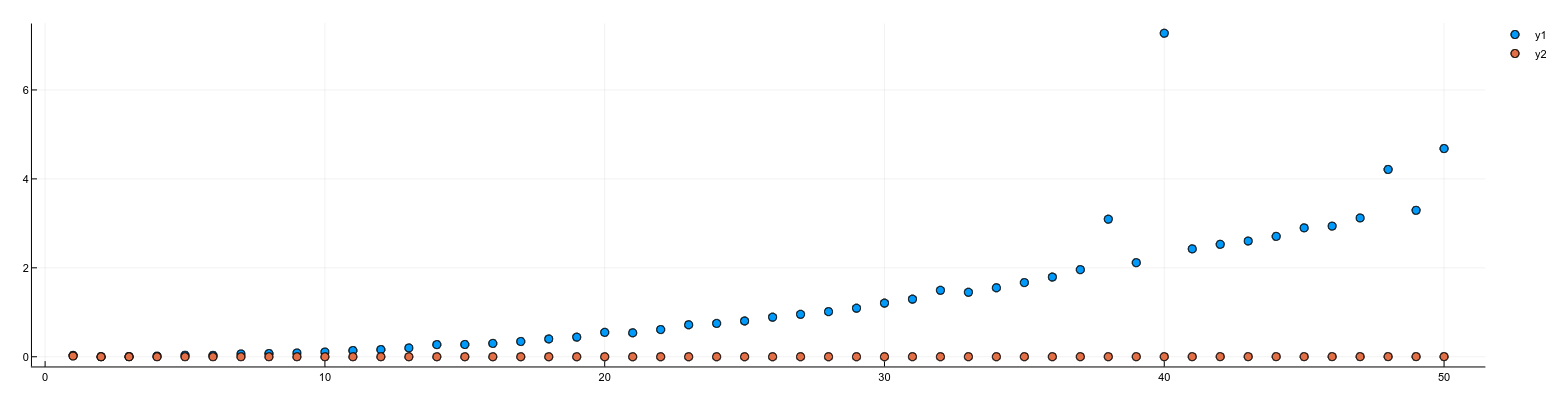

In [216]:
using Plots
plotly()
plot([time1,time2],seriestype=:scatter)

In [217]:
function Base.sort!(deck::Deck)
    for i in eachindex(deck.cards)
        key = deck.cards[i]
        j = i-1
        while j >=1 && deck.cards[j] > key
            deck.cards[j+1] = deck.cards[j]
            j -= 1
        end
        deck.cards[j+1] = key
    end
    deck
end

In [218]:
sort!(c)

4901-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 4890
 4891
 4892
 4893
 4894
 4895
 4896
 4897
 4898
 4899
 4900
 4901

In [219]:
c

4901-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 4890
 4891
 4892
 4893
 4894
 4895
 4896
 4897
 4898
 4899
 4900
 4901

## Abstract Types and Subtyping
* `abstract type TypeName end` ==> create a new abstract type

In [220]:
abstract type CardSet end

* when there isn't *supertype* be given, the ***default supertype** is **Any***

In [221]:
struct Deck2 <: CardSet
    cards :: Array{Card,1}
end

function Deck2()
    deck = Deck2(Card[])
    for suit in 1:4
        for rank in 1:13
            push!(deck.cards, Card(suit, rank))
        end
    end
    deck
end

Deck2

In [222]:
deck2 = Deck2()

A♣ 2♣ 3♣ 4♣ 5♣ 6♣ 7♣ 8♣ 9♣ 10♣ J♣ Q♣ K♣ A♦ 2♦ 3♦ 4♦ 5♦ 6♦ 7♦ 8♦ 9♦ 10♦ J♦ Q♦ K♦ A❤ 2❤ 3❤ 4❤ 5❤ 6❤ 7❤ 8❤ 9❤ 10❤ J❤ Q❤ K❤ A♠ 2♠ 3♠ 4♠ 5♠ 6♠ 7♠ 8♠ 9♠ 10♠ J♠ Q♠ K♠ 

In [223]:
deck2 isa CardSet

true

In [224]:
struct Hand <: CardSet
    cards :: Array{Card,1}
    label :: String
end

function Hand(label::String="")
    Hand(Card[],label)
end

Hand

In [225]:
hand = Hand("new hand")

## Abstract Types and Functions

In [226]:
function Base.show(io::IO, cs::CardSet)
    for card in cs.cards
        print(io, card, " ")
    end
end

function Base.pop!(cs::CardSet)
    pop!(cs.cards)
end

function Base.push!(cs::CardSet, card::Card)
    push!(cs.cards, card)
end

function Random.shuffle!(cs::CardSet)
    shuffle!(cs.cards)
    cs
end

In [227]:
deck2

A♣ 2♣ 3♣ 4♣ 5♣ 6♣ 7♣ 8♣ 9♣ 10♣ J♣ Q♣ K♣ A♦ 2♦ 3♦ 4♦ 5♦ 6♦ 7♦ 8♦ 9♦ 10♦ J♦ Q♦ K♦ A❤ 2❤ 3❤ 4❤ 5❤ 6❤ 7❤ 8❤ 9❤ 10❤ J❤ Q❤ K❤ A♠ 2♠ 3♠ 4♠ 5♠ 6♠ 7♠ 8♠ 9♠ 10♠ J♠ Q♠ K♠ 

In [228]:
pop!(deck2)

K♠

In [229]:
push!(deck2,Card(4,13))

52-element Vector{Card}:
 A♣
 2♣
 3♣
 4♣
 5♣
 6♣
 7♣
 8♣
 9♣
 10♣
 J♣
 Q♣
 K♣
 ⋮
 2♠
 3♠
 4♠
 5♠
 6♠
 7♠
 8♠
 9♠
 10♠
 J♠
 Q♠
 K♠

In [230]:
shuffle!(deck2)

6♦ A♦ K❤ 7❤ J❤ K♦ J♣ 6♠ 2♣ A♣ Q♠ J♦ 3♦ 6❤ A❤ 4❤ 4♠ K♠ 8♠ 8❤ 2♦ 10♦ Q❤ 4♣ A♠ 7♣ Q♣ 5♦ 5❤ 10♣ 9♣ 5♣ 2❤ 3♣ K♣ 4♦ Q♦ 9♠ 8♣ 3♠ 9♦ 9❤ 10♠ 3❤ 7♦ 6♣ 5♠ 7♠ 2♠ 10❤ J♠ 8♦ 

In [231]:
card = pop!(deck2)

8♦

In [232]:
push!(deck2,card)

52-element Vector{Card}:
 6♦
 A♦
 K❤
 7❤
 J❤
 K♦
 J♣
 6♠
 2♣
 A♣
 Q♠
 J♦
 3♦
 ⋮
 9♦
 9❤
 10♠
 3❤
 7♦
 6♣
 5♠
 7♠
 2♠
 10❤
 J♠
 8♦

In [233]:
function move!(cs1::CardSet, cs2::CardSet, n::Int)
    @assert 1<=n<=length(cs1.cards)
    for i in 1:n
        card = pop!(cs1)
        push!(cs2, card)
    end
    nothing
end

move! (generic function with 1 method)

In [234]:
all_cards = shuffle!(Deck2())
Jack = Hand(Card[],"Jack");
Wang = Hand(Card[],"Wang");
Li = Hand(Card[],"Li");
Rose = Hand(Card[],"Rose");

In [235]:
move!(all_cards, Jack, trunc(Int,52/4))
move!(all_cards, Wang, trunc(Int,52/4))
move!(all_cards, Li, trunc(Int,52/4))
move!(all_cards, Rose, trunc(Int,52/4))


In [236]:
Wang

A♠ 8♠ 7♦ Q♦ 6♦ 9❤ J♣ 10♦ 4♣ J♠ 10❤ 9♦ A♣ 

In [237]:
Li

Q♠ 5❤ 2♣ 6♣ 10♣ 5♣ 7❤ 6❤ 9♣ Q♣ 10♠ 7♠ J♦ 

## Three Relationships
### **has-a**
* Objects of a concrete type contain reference to objects of another type.(*Rectangle* --> *Point*)

### **is-a**
* A concrete type can have an abstract type as a supertype. (*Hand* --> *CardSet*)

### **Dependency**
* One type depend on anthor, Objects of one type take objects of the second type as parameters, or use objects of the second type as part of a computation.

## Debugging
* `@which function(variable)` variable must be defined, because of Multiple Dispatch

In [238]:
deck = Deck()
@which sort!(deck)

sort!(deck::Deck) in Main at In[217]:1

In [239]:
array = collect(randn(100))
@which sort!(array)

sort!(v::AbstractVector{T} where T; alg, lt, by, rev, order) in Base.Sort at sort.jl:729

* `supertype`

In [240]:
supertype(Deck2)

CardSet

## Data Encapsulation

In [241]:
struct Markov
    order :: Int64
    suffixes :: Dict{Tuple{String,Vararg{String}}, Array{String,1}}
    prefix :: Array{String,1}
    function Markov(order::Int64=2)
        new(order,Dict{Tuple{String, Vararg{String}},Array{String,1}}(),Array{String,1}())
    end
end

In [242]:
c = Markov()

Markov(2, Dict{Tuple{String, Vararg{String, N} where N}, Vector{String}}(), String[])

In [243]:
push!(c.prefix,"hell")

1-element Vector{String}:
 "hell"

In [244]:
get!(c.suffixes, (c.prefix...,),Array{String,1}())
push!(c.suffixes[(c.prefix...,)],"2")

1-element Vector{String}:
 "2"

In [245]:
Tuple{String,Vararg{String}}((["2131","213","dad","sda"]...,))

("2131", "213", "dad", "sda")

In [246]:
?Vararg

search: Vararg



```
Vararg{T,N}
```

The last parameter of a tuple type [`Tuple`](@ref) can be the special type `Vararg`, which denotes any number of trailing elements. The type `Vararg{T,N}` corresponds to exactly `N` elements of type `T`. `Vararg{T}` corresponds to zero or more elements of type `T`. `Vararg` tuple types are used to represent the arguments accepted by varargs methods (see the section on [Varargs Functions](@ref) in the manual.)

# Examples

```jldoctest
julia> mytupletype = Tuple{AbstractString, Vararg{Int}}
Tuple{AbstractString, Vararg{Int64, N} where N}

julia> isa(("1",), mytupletype)
true

julia> isa(("1",1), mytupletype)
true

julia> isa(("1",1,2), mytupletype)
true

julia> isa(("1",1,2,3.0), mytupletype)
false
```


In [247]:
function processword(markov::Markov, word::String)
    if length(markov.prefix) < markov.order
        push!(markov.prefix, word)
    end
    
    get!(markov.suffixes, (Markov.prefix...),Array{String,1}())
    push!(markov.suffixes[(markov.prefix...)], word)
    popfirst!(markov.prefix)
    push!(markov,prefix,word)
end

processword (generic function with 1 method)

In [248]:
Array{String,1}()

String[]

#### Ex18-3

In [249]:
suffixes = Dict();
prefix = [];

In [250]:
struct Markov_self
    order :: Int64
    prefix :: Array{String,1}
    suffixes :: Dict{Tuple{String,Vararg{String}}, Array{String,1}}
    
    function Markov_self(order::Int64=2)
        new(order, Array{String,1}(), Dict{Tuple{String,Vararg{String}}, Array{String,1}}())
    end
end

In [251]:
Markov_self()

Markov_self(2, String[], Dict{Tuple{String, Vararg{String, N} where N}, Vector{String}}())

#### Ex18-5

In [252]:
deck = Deck()
function Base.length(deck::Deck)::Int64
    length(deck.cards)
end

function deal!(deck::Deck, num_hands::Int64, num_cards::Int64)
    @assert(length(deck) >= num_hands * num_cards, "too much cards required")
    Hands = CardSet[]
    shuffle!(deck)
    for hand in collect(1:num_hands)
        push!(Hands,Hand(Card[],"No.$(hand) Player"))
#         @show typeof(Hands[hand])
        for card in collect(1:num_cards)
            push!(Hands[hand].cards, pop!(deck))
        end
    end
    Hands
end

deal! (generic function with 1 method)

In [253]:
deck = Deck()
deal!(deck,5,2)[1].label

"No.1 Player"

In [254]:
test=Hand()

In [255]:
typeof(pop!(deck))

Card

In [256]:
push!(test.cards,pop!(deck))

1-element Vector{Card}:
 2❤

In [257]:
Base.length

length (generic function with 151 methods)

In [258]:
length(deck)

40

#### Ex18-6

In [259]:
function Base.sort!(cs::CardSet)
    for i in eachindex(cs.cards)
        key = cs.cards[i]
        j = i-1
        while j >= 1 && key < cs.cards[j]
            cs.cards[j+1] = cs.cards[j]
            j-=1
        end
        cs.cards[j+1] = key
    end
    cs
end
function sort_by_rank!(cs::CardSet)
    for i in eachindex(cs.cards)
        key = cs.cards[i]
        j = i-1
        while j >= 1 && key.rank < cs.cards[j].rank
            cs.cards[j+1] = cs.cards[j]
            j-=1
        end
        cs.cards[j+1] = key
    end
    cs
end

function sort_by_suit!(cs::CardSet)
    for i in eachindex(cs.cards)
        key = cs.cards[i]
        j = i-1
        while j >= 1 && key.suit < cs.cards[j].suit
            cs.cards[j+1] = cs.cards[j]
            j-=1
        end
        cs.cards[j+1] = key
    end
    cs
end

sort_by_suit! (generic function with 1 method)

In [260]:
rdeck = shuffle!(Deck2())

7❤ 10♦ A♣ 2♣ J♦ K♦ 4♦ 8♠ J♠ 5❤ A❤ 2❤ Q♣ 7♦ 4♣ 3❤ 5♣ 4❤ 5♠ 8♣ 8♦ 7♠ Q♠ J❤ 2♠ K❤ 6❤ 6♦ 6♠ K♣ 9❤ J♣ 3♠ 2♦ 7♣ 6♣ 5♦ 10♠ 10♣ K♠ Q♦ 9♠ 8❤ 9♣ A♠ A♦ 4♠ 3♣ 3♦ Q❤ 9♦ 10❤ 

In [261]:
sort_by_rank!(rdeck)

A♣ A❤ A♠ A♦ 2♣ 2❤ 2♠ 2♦ 3❤ 3♠ 3♣ 3♦ 4♦ 4♣ 4❤ 4♠ 5❤ 5♣ 5♠ 5♦ 6❤ 6♦ 6♠ 6♣ 7❤ 7♦ 7♠ 7♣ 8♠ 8♣ 8♦ 8❤ 9❤ 9♠ 9♣ 9♦ 10♦ 10♠ 10♣ 10❤ J♦ J♠ J❤ J♣ Q♣ Q♠ Q♦ Q❤ K♦ K❤ K♣ K♠ 

In [262]:
sort_by_suit!(rdeck)

A♣ 2♣ 3♣ 4♣ 5♣ 6♣ 7♣ 8♣ 9♣ 10♣ J♣ Q♣ K♣ A♦ 2♦ 3♦ 4♦ 5♦ 6♦ 7♦ 8♦ 9♦ 10♦ J♦ Q♦ K♦ A❤ 2❤ 3❤ 4❤ 5❤ 6❤ 7❤ 8❤ 9❤ 10❤ J❤ Q❤ K❤ A♠ 2♠ 3♠ 4♠ 5♠ 6♠ 7♠ 8♠ 9♠ 10♠ J♠ Q♠ K♠ 

In [263]:
deck = Deck()
all_players = deal!(deck,4,10)

4-element Vector{CardSet}:
 A♣ K♠ Q♣ A♠ 8♣ 8♦ 3❤ K❤ 4♣ 9♦ 
 2❤ 3♠ 5♠ 5♦ 2♠ 10♠ 7♦ J♠ 6♠ J♣ 
 K♣ 8♠ 7♣ 6❤ A❤ K♦ 4❤ 9♣ 9❤ 10♣ 
 3♦ 6♣ A♦ 2♦ 4♠ 6♦ Q❤ 9♠ Q♠ 8❤ 

In [264]:
function hist_rank(cs::CardSet)
    d = Dict{Int64,Int64}()
    for i in cs.cards
#         @show i.suit
        d[i.rank] = get(d,i.rank, 0) + 1
    end
    d
end

function hist_suit(cs::CardSet)
    d = Dict{Int64,Int64}()
    for i in cs.cards
#         @show i.suit
        d[i.suit] = get(d,i.suit, 0) + 1
    end
    d
end

hist_suit (generic function with 1 method)

In [265]:
typeof(all_players[1].cards[1].suit)

Int64

In [266]:
findall(x->x==3,collect(values(rank_dict)))

LoadError: UndefVarError: rank_dict not defined

In [267]:
function haspair(cs::CardSet)
    rank_dict = hist_rank(cs)
    !isempty(findall(x->x>=2,collect(values(rank_dict))))
end

haspair (generic function with 1 method)

In [268]:
haspair(all_players[2])

true

In [269]:
function hastwopair(cs::CardSet)
    rank_dict = hist_rank(cs)
    length(findall(x->x>=2,collect(values(rank_dict)))) >=2
end

hastwopair (generic function with 1 method)

In [270]:
hastwopair(all_players[4])

true

In [271]:
function hasthreeofakind(cs::CardSet)
    rank_dict = hist_rank(cs)
    !isempty(findall(x->x>=3,collect(values(rank_dict))))
end

hasthreeofakind (generic function with 1 method)

In [272]:
hasthreeofakind(all_players[2])

false

In [273]:
function record_continue(array::Array{Int64,1})
    count_array = []
    new_array = sort(array)
    record_array = [new_array[1]]
    for i in eachindex(new_array)[2:end]
        d = new_array[i] - new_array[i-1]
        if d == 1 && i ≠ length(new_array)
            push!(record)
        elseif d == 1 && i == length(new_array)
            con_num += 1
            push!(count_array, con_num)
            con_num = 0
        else
            push!(count_array, con_num)
            con_num = 0
        end
    end
    count_array
end

record_continue (generic function with 1 method)

In [274]:
function count_continue(array::Array{Int64,1})
    count_array = []
    new_array = sort(array)
    con_num = 0
    con_array = []
    for i in eachindex(new_array)[2:end]
        d = new_array[i] - new_array[i-1]
        if d == 1 && i ≠ length(new_array)
            con_num += 1
        elseif d == 1 && i == length(new_array)
            con_num += 1
            push!(count_array, con_num)
            con_num = 0
        else
            push!(count_array, con_num)
            con_num = 0
        end
    end
    count_array
end
function hasstraight(cs::CardSet, num::Int64 = 5)
    rank_dict = hist_rank(cs)
    low_con = collect(keys(rank_dict))
    high_con = sort(replace(collect(keys(rank_dict)), 1=>14))
    low_con_num_array = count_continue(low_con)
    high_con_num_array = count_continue(high_con)
    maximum(low_con_num_array) >= num - 1 || maximum(high_con_num_array) >= num - 1
end

hasstraight (generic function with 2 methods)

In [275]:
hasstraight(all_players[2])

false

In [276]:
sort(collect(keys(hist_rank(all_players[2]))))

7-element Vector{Int64}:
  2
  3
  5
  6
  7
 10
 11

In [277]:
function hasflush(cs::CardSet)
    suit_dict = hist_suit(cs)
#     @show maximum(values(suit_dict))
    maximum(values(suit_dict)) >= 5
end

hasflush (generic function with 1 method)

In [278]:
hasflush(all_players[3])

false

In [279]:
hist_suit(all_players[3])

Dict{Int64, Int64} with 4 entries:
  4 => 1
  2 => 1
  3 => 4
  1 => 4

In [280]:
function hasfullhouse(cs::CardSet)
    rank_dict = hist_rank(cs)
#     @show maximum(values(rank_dict))
    length(findall(x -> x>=2, collect(values(rank_dict))))>=2 && length(findall(x -> x>=3, collect(values(rank_dict)))) >=1
end

hasfullhouse (generic function with 1 method)

In [281]:
deck = Deck()
all_players = deal!(deck,4,10)

4-element Vector{CardSet}:
 K❤ 6♦ J♦ 2♦ 8❤ 6♠ Q♦ 9♦ 8♣ 3♣ 
 7♦ 9❤ 10♠ 4♠ 7❤ 8♦ 4❤ 5♦ 9♠ 7♠ 
 2❤ J♠ 2♣ Q❤ 8♠ 5♠ K♦ 3♠ 5❤ A♠ 
 K♣ 6♣ Q♠ 10❤ 5♣ 2♠ 3♦ J❤ Q♣ A♣ 

In [282]:
hist_rank(all_players[3])

Dict{Int64, Int64} with 8 entries:
  5  => 2
  13 => 1
  2  => 2
  11 => 1
  12 => 1
  8  => 1
  3  => 1
  1  => 1

In [283]:
function hasfourofakind(cs::CardSet)
    rank_dict = hist_rank(cs)
#     @show maximum(values(rank_dict))
    maximum(values(rank_dict))==4
end

hasfourofakind (generic function with 1 method)

In [284]:
hasfourofakind(all_players[3])

false

In [285]:
import Base.-

function -(c1::Card,c2::Card)
    if c1.suit ≠ c2.suit
        return 100
    end
    c1.rank - c2.rank
end

- (generic function with 226 methods)

In [286]:
function count_strict_continue(cs::CardSet)
    count_array = []
    new_array = sort!(cs)
#     @show new_array
    con_num = 0
    for i in eachindex(new_array.cards)[2:end]
#         @show new_array.cards[i]
        d = new_array.cards[i] - new_array.cards[i-1]
        if d == 1 && i ≠ length(new_array.cards)
            con_num += 1
        elseif d == 1 && i == length(new_array.cards)
            con_num += 1
            push!(count_array, con_num)
            con_num = 0
        else
            push!(count_array, con_num)
            con_num = 0
        end
    end
    count_array
end
function hasstraightflush(cs::CardSet,num::Int64=5)
    low_con = deepcopy(cs);
    high_con = deepcopy(cs);
    

    for i in eachindex(high_con.cards)
        if high_con.cards[i].rank == 1
            push!(high_con.cards, Card(high_con.cards[i].suit,14))
            deleteat!(high_con.cards, i)
        end
    end

    low_con_num_array = count_strict_continue(low_con)
    high_con_num_array = count_strict_continue(high_con)
    maximum(low_con_num_array) >= num - 1 || maximum(high_con_num_array) >= num - 1
end

hasstraightflush (generic function with 2 methods)

In [287]:
t  = Hand(Card[],"1")
for i in 10:13
    push!(t.cards,Card(1,i))
end
push!(t.cards,Card(1,1))

5-element Vector{Card}:
 10♣
 J♣
 Q♣
 K♣
 A♣

In [288]:
hasstraightflush(t)

true

In [289]:
high_con = deepcopy(all_players[3])
a_index = []
for i in eachindex(high_con.cards)
    if high_con.cards[i].rank == 1
        push!(high_con.cards, Card(high_con.cards[i].suit,14))
        deleteat!(high_con.cards, i)
    end
end

In [290]:
sort!(high_con)

2♣ K♦ 2❤ 5❤ Q❤ 3♠ 5♠ 8♠ J♠ A♠ 

In [291]:
deleteat!(high_con.cards, a_index[1])

LoadError: BoundsError: attempt to access 0-element Vector{Any} at index [1]

In [292]:
for i in all_players[3].cards
    println()

LoadError: syntax: incomplete: "for" at In[292]:1 requires end

In [293]:
c = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [294]:
function classify(cs::CardSet)
    if hasstraightflush(cs)
        return "Straight flush"
    elseif hasfourofakind(cs)
        return "Four of a kind"
    elseif hasfullhouse(cs)
        return "Full house"
    elseif hasflush(cs)
        return "FLush"
    elseif hasstraight(cs)
        return "Straight"
    elseif hasthreeofakind(cs)
        return "three of a kind"
    elseif hastwopair(cs)
        return "Two pair"
    elseif haspair(cs)
        return "Pair"
    end
    return "Unfortunately"
end

classify (generic function with 1 method)

In [304]:
classify(all_players[2])

"Full house"

In [303]:
hist_suit(all_players[2])

Dict{Int64, Int64} with 3 entries:
  4 => 4
  2 => 3
  3 => 3

In [307]:
function deal!(deck::Deck, num_hands::Int64, num_cards::Int64)
    @assert(length(deck) >= num_hands * num_cards, "too much cards required")
    Hands = CardSet[]
    shuffle!(deck)
    for hand in collect(1:num_hands)
        temp_hand = Hand()
        for card in collect(1:num_cards)
            push!(temp_hand.cards, pop!(deck))
        end
        label = classify(temp_hand)
        push!(Hands,Hand(temp_hand.cards,label))
    end
    Hands
end

deal! (generic function with 1 method)

In [318]:
function Base.show(io::IO,hand::Hand)
    print(io,hand.cards,"\t",hand.label)
end

In [431]:
classification = String[]
for i in 1:100000
    deck = Deck()
    hands = deal!(deck,6,7)
    for hand in hands
        push!(classification, hand.label)
    end
end

In [432]:
function hist(a::Array)
    d = Dict()
    for i in a
        d[i] = get(d,i,0) +1
    end
    d
end

hist (generic function with 1 method)

In [433]:
hist_c =hist(classification)

Dict{Any, Any} with 9 entries:
  "FLush"           => 18237
  "Straight"        => 27598
  "pair"            => 263571
  "Unfortunately"   => 104437
  "Two pair"        => 140590
  "Straight flush"  => 183
  "Full house"      => 15598
  "three of a kind" => 28778
  "Four of a kind"  => 1008

In [434]:
using DataFrames
df = DataFrame(
    classificaiton = [String(k[2]) for k in sort([(j,i) for (i,j) in hist_c])],
    num = [k[1] for k in sort([(j,i) for (i,j) in hist_c])]
);

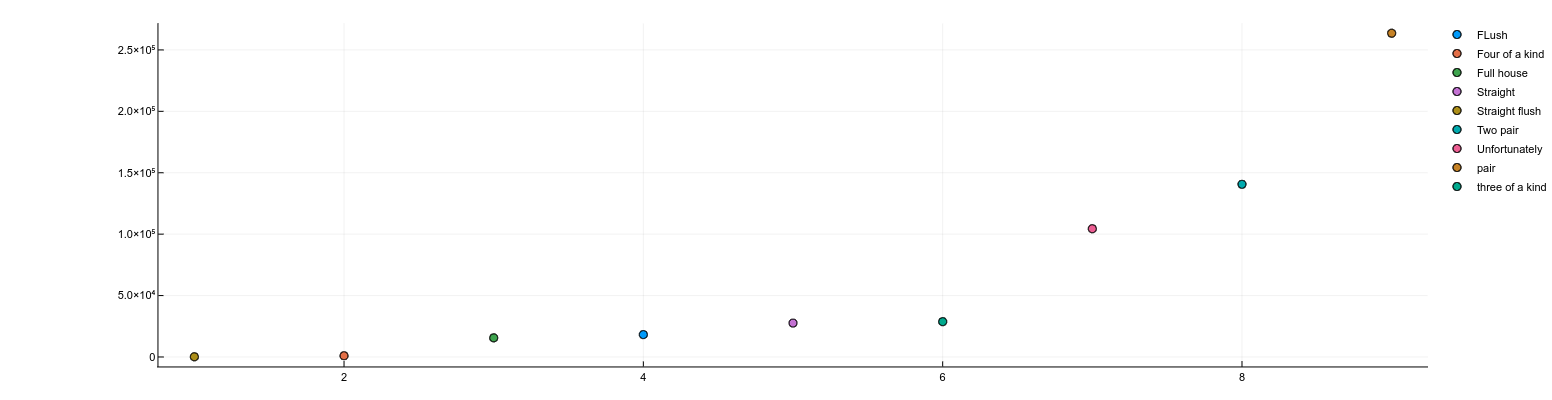

In [435]:
using Plots,StatsPlots

plotly()
@df df plot(
    :num,
    seriestype=:scatter,
    group = :classificaiton
)

In [413]:
df.classificaiton

9-element Vector{String}:
 "FLush"
 "Straight"
 "pair"
 "Unfortunately"
 "Two pair"
 "Straight flush"
 "Full house"
 "three of a kind"
 "Four of a kind"

In [331]:
sort!(c[3])

Card[4♣, 5♣, 7♦, J♦, 8❤, 10❤, 3♠, 6♠, 7♠, K♠]	Straight